<a href="https://colab.research.google.com/github/PrinceChauhan608/HOTELDBA-EDA-CAPSTONE/blob/main/Collab_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Importing Essential libraries**

In [61]:
#importing libraries-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# **Mounting Drive**

In [12]:
#mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#importing dataset-

hoteldb1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Analysis Capstone Project/Hotel Bookings (1).csv')

# **Creating a Copy of our dataset.**

In [14]:
# creating a copy of our dataset.
hoteldb=hoteldb1.copy()

# **Overview of the Dataset**

In [15]:
#Data Exploration(Total rows and columns count)-

print(f"We have {hoteldb.shape[0]} Rows and {hoteldb.shape[1]} Columns.")

We have 119390 Rows and 32 Columns.


In [16]:
#Top 5 Rows-

hoteldb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [17]:
#Last 5 rows-

hoteldb.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [18]:
#Calculate the basic statical data-

hoteldb.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [19]:
#List of Columns-

list(hoteldb.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [20]:
#Prints number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column-

hoteldb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [21]:
#Check data types-

hoteldb.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# **For Checking Unique Contents**

In [24]:
hoteldb['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [25]:
hoteldb['is_canceled'].unique()

array([0, 1])

In [26]:
hoteldb['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [27]:
hoteldb['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [28]:
hoteldb['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [29]:
hoteldb['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [30]:
hoteldb['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

# **Now, we'll perform a quick check for missing/Null values**

In [31]:
#check for missing values

hoteldb.isna().sum(axis = 0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

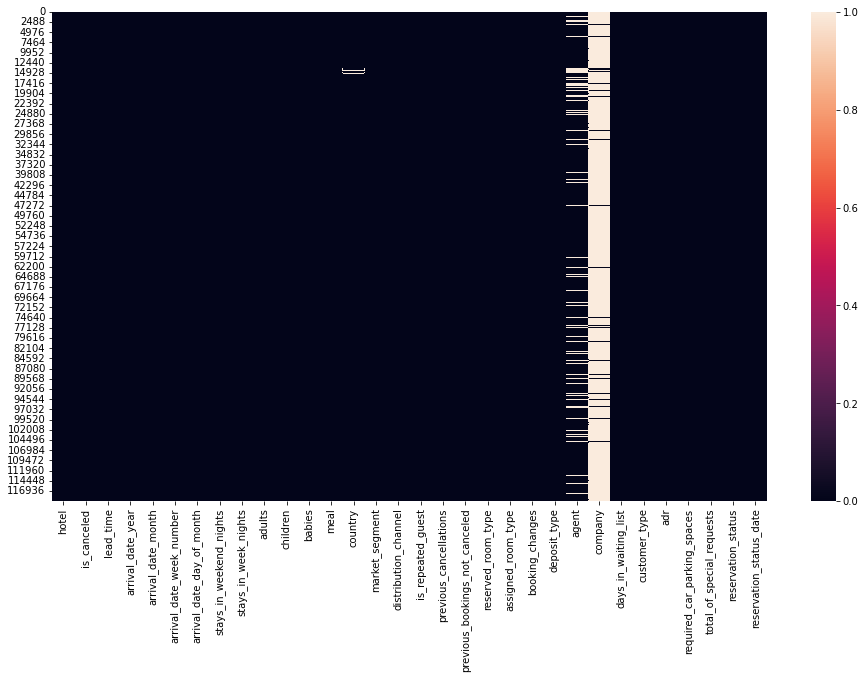

In [32]:
# visualize missing value using heatmap to get idea where is the value missing

plt.figure(figsize=(16,9))
sns.heatmap(hoteldb.isnull())

## ***Since, we can see agent, company and country are having most null values, we'll check what's in them.***

In [33]:
#checking contents of agent column

agentlist = hoteldb['agent'].tolist()
#list(agentlist) #remove # to view its contents

In [34]:
#checking contents of company column

companylist = hoteldb['company'].tolist()
#list(companylist) #remove # to view its contents

In [35]:
#checking contents of country column

countrylist = hoteldb['country'].tolist()
#list(countrylist) #remove # to view its contents

## ***From the above data, it is clear that we won't be requiring agent and company data but we need country data and NULL values within it needs to be taken care of. So we'll be doing proper CLEANSING of data.***

In [36]:
#Removing company and agent column

hoteldb= hoteldb.drop(columns=['agent', 'company'])

#Removing missing values

hoteldb = hoteldb.dropna()
print(hoteldb.isna().sum(axis=0))

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [40]:
# converting all the null values to 0 for proper analysis

df = hoteldb.fillna(0)

In [39]:
# how many null values left(will be depicted by 0)

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [41]:
# in country column, we need to replace zeros with something more adequate

hoteldb.country = hoteldb.country.replace(0, "not mentioned")

# **NOW WE HAVE CLEAN DATA FOR PROPER EDA**

## **Let's get basic idea of statistics through visualization**

# **Univariate Analysis :**
In Univariate Analysis, we choose a 
single feature from the data and try 
to determine what the output or the target value is ,i.e., one 
feature/variable at a time.


## ***1]*** ***which type of Hotel is mostly Preferred by the Guests?***

In [ ]:
#bookings statistics of both hotels.

df=hoteldb['hotel'].value_counts()
df.plot(kind='bar',width=.4 ,color=['black','blue'],figsize = (10, 5))
plt.xlabel("Type of hotel")
plt.ylabel("No. of bookings")
plt.title("Bookings ratio")
plt.show()

In [ ]:
#Visualizng by the Pie Chart.

dff=hoteldb['hotel'].value_counts()
diagram=dff.plot(kind='pie',explode=[0.05,0.05],subplots=True, shadow = True,startangle=90,figsize=(10,7), autopct='%1.1f%%', colors = ['yellow', 'red'],title = 'Percentage of guests in both hotels' )


## ***Observation***

### ***City Hotel is most preferred hotel by guests. Thus city hotels has maximum bookings.***



## ***2] Adults traveling with kids or without kids?***

In [ ]:
#Visualizng by the Pie Chart.
hoteldb['children'].value_counts
x = ["with kids", "without kids"]
y = [hoteldb[(hoteldb.children != 0) | (hoteldb.babies != 0)]["adults"].count(), hoteldb[(hoteldb.children == 0) | (hoteldb.babies == 0)]["adults"].count()]



fig = plt.figure(figsize =(10, 7))
colors = sns.color_palette('bright')
plt.pie(y, labels = x, colors = colors)
plt.title("Kids vs Without kids")
plt.show()

## ***Observation***
### ***The Guests visit in the hotel without kids is more than with kids.***

## ***3] What are the most preferred Distribution channel for booking hotels?***

Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

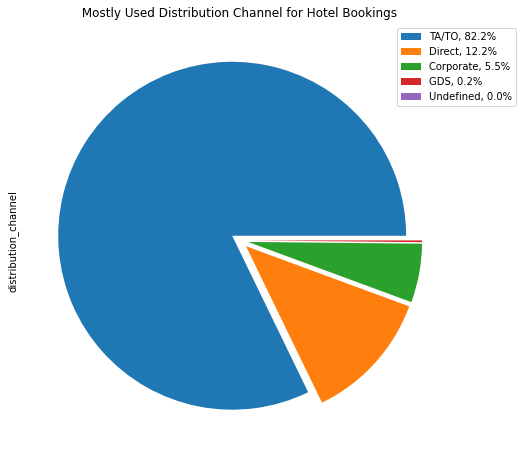

In [45]:
# Visualizsing the by pie chart.

#Creating labels.
labels=hoteldb['distribution_channel'].value_counts().index.tolist()



# creating new df of distribution channel.
distribution_channel_df=hoteldb['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})



#adding percentage columns to the distribution_channel_df.
distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/hoteldb.shape[0],1)



#Creating list of percentage.
sizes=distribution_channel_df['percentage'].values.tolist()



#plotting the pie chart.
hoteldb['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=False, figsize=(15,8),fontsize=10,labels=None)   



# setting legends with the percentage values.
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')

### ***Observation***
## ***'TA/TO' is mostly(79.1%) used for booking hoetls.***

## ***4] What is the percentage of Cancellation?***

In [83]:
#Let’s write the function to get the percentage of different values.

def get_count1(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [84]:
#Now let’s use this function on our is_canceled feature and see the result.

x,y = get_count1(hoteldb['is_canceled'])
x,y

(array([0, 1]), array([62.86480849, 37.13519151]))

In [85]:
#plot the digram through write function
def plot(x, y,tittle=None,x_label=None,y_label=None, title=None, figsize=(12,8), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('white')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


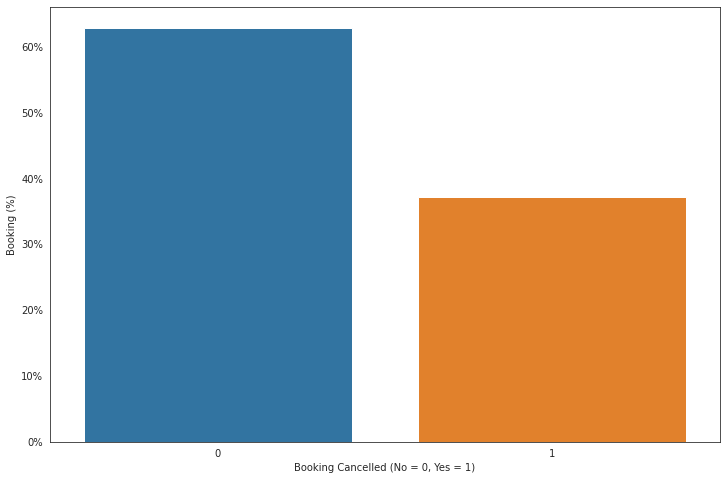

In [86]:
#Now let’s call the function
plot(x,y,tittle='Cancellation and non Cancellation',x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

Text(0.5, 1.0, 'Cancellation and non Cancellation')

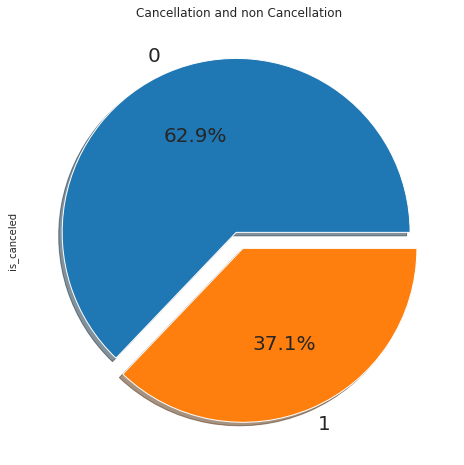

In [60]:
#Visualizing the percentage of cancellation and non cancellation by the pie chart.

hoteldb['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

## ***Observation***
### ***0= not canceled***
### ***1= canceled***

### ***37.1 % of the bookings were cancelled.***

## ***5] What is the percentage distribution of "Customer Type"?***

In [ ]:
hoteldb['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=True,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None)


labels=hoteldb['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

***1. Contract*** 
>***when the booking has an allotment or other type of contract associated to it.***

***2. Group***
> ***when the booking is associated to a group.***

***3. Transient***
>***when the booking is not part of a group or contract, and is not associated to other transient booking.***

***4. Transient-party***
>***when the booking is transient, but is associated to at least other transient booking.***

## ***Observation***
### ***Transient customer type is more whcih is 82.4 %. percentage of  Booking associated by the Group is vey low.***

## ***6] What is the Percentage of repeated guests?***

In [ ]:
hoteldb['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(15,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests")

## ***Observation:***
### ***Repeated guests are very few which only 3.9 %.***
### ***In order to retained the guests management should take feedbacks from guests and try to imporve the services.***

## ***7] What is the percentage distribution of required car parking spaces?***

In [ ]:
hoteldb['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5,autopct='%1.1f%%',shadow=False,figsize=(15,8),fontsize=15,labels=None)

labels=hoteldb['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

## ***Observation***
### ***91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.***

## ***8] What is the percentage of booking changes made by the customer?***

In [ ]:
booking_changes_df=hoteldb['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/hoteldb.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

### 0= 0 changes made in the booking
### 1= 1 changes made in the booking
### 2= 2 changes made in the booking

## ***Observation***
### ***Almost 82% of the bookings were not changed by guests.***


## ***9] Which type of food is mostly preferred by the guests?***

In [ ]:
hoteldb['meal'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(15,8),fontsize=20)
plt.figure(figsize=(12,8))
sns.countplot(x=hoteldb['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")


**Types of meal in hotels:**
* BB - (Bed and Breakfast)
* HB- (Half Board)
* FB- (Full Board)
* SC- (Self Catering)
## ***Observation***
### ***So the most preferred meal type by the guests is BB( Bed and Breakfast).*** 
### ***HB- (Half Board) and SC- (Self Catering) are equally preferred.***


# ***10] From which country the most guests are coming?***

In [ ]:
# Counting the guests from various countries.

country_df=hoteldb['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]



# Visualizing by  plotting the graph.

plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")

## ***Observation***
### ***Most of the guests are coming from portugal i.e more 25000 guests are from portugal.***
**abbreevations for countries-**



1.   PRT- Portugal
2.   GBR- United Kingdom
3.   FRA- France
4.   ESP- Spain
5.   DEU - Germany
6.   ITA -Itlay
7.   IRL - Ireland
8.   BEL -Belgium
9.   BRA -Brazil
10.  NLD-Netherlands





# **Bivariate Analysis:** 
In a Bivariate Analysis, we try to analyze 
two features instead of one, and finally 
determine the classification of output we are 
looking for.

## ***1] In Which month  most of the booking happened.***

In [62]:
# groupby arrival_date_month and taking the hotel count.
counts_per_month=hoteldb.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})



# Create list of months in order.
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']



# creating df which will map the order of above months list without changing its values.
counts_per_month['arrival_date_month']=pd.Categorical(counts_per_month['arrival_date_month'],categories=months,ordered=True)



# sorting by arrival_date_month.
counts_per_month=counts_per_month.sort_values('arrival_date_month')
counts_per_month

,arrival_date_month,Counts
4,January,5874
3,February,8012
7,March,9739
0,April,11045
8,May,11779
6,June,10927
5,July,12628
1,August,13852
11,September,10467
10,October,11095


In [ ]:
# plotting it
counts_per_month= hoteldb.arrival_date_month.value_counts()
counts_per_month.plot.pie(figsize=(15,10), title='Booking frequency every month', autopct='%1.1f%%' , fontsize=20 , shadow=True)

In [ ]:
# set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=counts_per_month['arrival_date_month'],y=counts_per_month['Counts'])



# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

 ## ***Observation***
 
#### ***July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.***

## ***2] Which year and hotel had the highest bookings?***

In [ ]:
#Bookings statistics yearwise

total_hotel_booking=hoteldb.groupby('arrival_date_year')['hotel'].count()
total_hotel_booking
diagram=total_hotel_booking.plot(kind='bar', width=0.9 ,color=['b','g','r','c','m','y','k'],figsize=(10,5), title = 'Bookings in respective years')

In [ ]:
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=hoteldb['arrival_date_year'],hue=hoteldb['hotel'])
plt.title("Year Wise bookings")

## ***Observation***
### ***2016 had the higest bookings.***
### ***2015 had the lowest bookings.***
### ***overall City hotels had the most of the bookings.***

## ***3] Which one is having higher number of stays Week nights or Weekend nights?***



In [ ]:
#To find number of stays in week nights and weekend nights.

week_and_weekend_stay=hoteldb[['stays_in_weekend_nights','stays_in_week_nights']].sum().reset_index().rename(columns={'index':'time of week',0:'stays'})
week_and_weekend_stay

In [ ]:
#Plotting number of week night and weekend nights on a bar chart

plt.barh(week_and_weekend_stay['time of week'],week_and_weekend_stay['stays'],color='green',edgecolor='black',height=0.9)
plt.title('Number of stay in weekend vs weekdays')
plt.ylabel('Time of the week')
plt.xlabel('Nights of stay')

## ***Observation***
### ***Guests Stays more in week nights than weekend nights.***

## ***4] Which Hotels has the most repeated guests?***

In [ ]:
#repeated guest=1
#not repeated guest=0
#groupby hotel.
repeated_guests_df=hoteldb[hoteldb['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})



#set plot size adn plot barplot.
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])



# set labels.
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

## ***Observation***
### ***Resort Hotel has slightly more repeated guests than the City Hotels. It is almost similar for both hotels.***

## ***5] Which hotel type has the highest ADR(Average Daily Rate)?***

In [ ]:
# group by hote.
group_by_hotel=hoteldb.groupby('hotel')



#grouping by hotel ADR.
highest_adr=group_by_hotel['adr'].mean().reset_index()



#set plot size.
plt.figure(figsize=(10,8))



# set labels.
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")



#plot the graph.
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

## ***Observation***
### ***City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.***

## ***6] What is the ADR across the different months?***

In [ ]:
#groupby.
bookings_by_months_df=hoteldb.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()



#create month list.
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)



#sortting.
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df


In [ ]:
# set plot size and plot the line
plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])



# set lables
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

## ***Observation***

### ***For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.***

### ***The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.*** 

## ***7] Which distribution channel contributed more to ADR in order to increase the the income?***

In [ ]:
# group by distribution channel and hotel.
distribution_channel_df=hoteldb.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()



# set plot size and plot barchart.
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')

* Corporate- These are corporate hotel booing companies which makes bookings 
possible.
* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct- means that bookings are directly made with the respective hotels
* TA/TO- means that booings are made through  travel agents or travel operators.
* Undefined- Bookings are undefined. may be customers made their bookings on arrival.

## ***Observation***
### ***From the plot it is clear that.*** 
### ***'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.***
###  ***GDS has highly contributed in adr in 'City Hotel' type.***
### ***GDS needs to increase Resort Hotel bookings.***

## ***8] What is the ADR across different  market segment.***


In [ ]:
#Group by.
Grupby=hoteldb.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()



# set plot size and plto barchart
plt.figure(figsize=(18,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=Grupby.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment')

## ***Obseravtion***
### ***'Direct' and 'Online TA' are contributing the most in both types of hotels.***
### ***Aviation segment should focus on increasing the bookings of 'City Hotel'.***

## ***9] How does length of stay affects the ADR?***

In [ ]:
# Groupby adr,total,stay,hotel,
adr_vs_stay = hoteldb.groupby(['total_stay', 'adr','hotel']).agg('count').reset_index()
adr_vs_stay = adr_vs_stay.iloc[:, :3]
adr_vs_stay = adr_vs_stay.rename(columns={'is_canceled':'Number of stays'})
adr_vs_stay=adr_vs_stay[:18000]
adr_vs_stay

In [ ]:
#plot line chart
plt.figure(figsize=(16,8))
sns.lineplot(x='total_stay',y='adr',data=adr_vs_stay)
plt.title('Relationship between adr and total stay')

## ***Observation***
### ***As the total stay increases the  ADR also increases.***

## ***10] Which hotel has longer waiting time?***

In [ ]:
#groupping by hoetl and takin mean of days in waiting list
waiting_time_df=hoteldb.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
# waiting_time_df

#set the plot size
plt.figure(figsize=(10,8))

# plot barchart
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")

## ***Observation***
### ***So the City Hotels has longer waiting period than the Resort Hotel. Thus we can say that City Hotels are much busier than the Resort Hotels***

## ***11] Which Market Segment  has the higest cancellation rate?***

In [ ]:
market_segment_df=hoteldb[hoteldb['is_canceled']==1]   # canceled=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

In [ ]:
#set plotsizde and plot barchart.
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)



# set labels.
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

## ***Observation*** 
### ***'Online T/A' has the highest cancellation in both type of cities.***
### ***In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies.***

## ***12]What is the Optimal stay length in both types of hotels?***

In [ ]:
#group by total stay and hotel.
stay = hoteldb.groupby(['total_stay', 'hotel']).agg('count').reset_index()



#take 1st 3 columns. 
stay = stay.iloc[:, :3]  
#rename the columns.                                        
stay = stay.rename(columns={'is_canceled':'Number of stays'})   


In [ ]:
# set plot size and plot barchart.
plt.figure(figsize=(15,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=stay)



#set labels.
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

## ***Observation***
### ***Optimal stay in both the type hotel is less than 7 days.***

# **Multivariate Analysis :**
Multivariate analysis deals with such a 
complex set of data with more than two 
features and variables.


## ***From the histograms below we can have a brief picture of various column trends.***


In [ ]:
hoteldb.hist(figsize=(20,14))
plt.show()

## ***Requirement of car parking spaces year and month wise.***

In [ ]:
#Creating a line chart to express the relation between the required number of car parking spaces and year by using seaborn

plt.figure(figsize=(14,5))
sns.lineplot(data=hoteldb,x="arrival_date_month", y="required_car_parking_spaces", hue = 'arrival_date_year', palette= 'Set2')
plt.legend(['2015', '2016', '2017'])
plt.title("Year wise parking requirements of hotels ", fontsize = 18)
plt.ylabel("Number of car parking spaces required",fontsize = 15)
plt.xlabel("Months",fontsize = 15)

## ***Bookings made through market segments by different countries.***

In [ ]:
#Plotting bookings made through three main market segments by different countries' 

market_segment_by_country=hoteldb.groupby(['country','market_segment'])['market_segment'].count().unstack().sort_values('Direct',ascending=False).head(10)
market_segment_by_country[['Direct','Offline TA/TO','Online TA']].plot(kind='bar',width=0.8)
plt.title('Bookings made by different market segments according to countries')
plt.xlabel('Countries')
plt.ylabel('Number of bookings')
plt.rcParams['figure.figsize'] = (12, 8)


## ***Correlation of the Columns.***

In [ ]:
# correlation graph of the data using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(hoteldb.corr(),annot=True)
plt.title('Co-relation of the columns')

## **Correlation Analysis**

In [ ]:
correlation = hoteldb.corr()
correlation

1) Stays in week night and total stay are positively corelated, even more than weekend nights which says, longer stays are in week time only.

2) lead_time and total_stay is positively corelated. That means more is the stay of customer more will be the lead time.

3) Total people, total stay and ADR has positive correlation which means more the people, longer the stay will give more revenue.

4) is_repeated guest and previous bookings not canceled has strong correlation. may be repeated guests are not more likely to cancel their bookings.

5) adults and lead time a positively corelated which means more the adults more the lead time

6) children and lead time a re negatively co-related means more the children lesser the lead time.

7) ADR and children are very positively corelated, which states more the children more is the revenue.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

grp_by_room = hoteldb.groupby('assigned_room_type')
hoteldb['Num_of_bookings'] = grp_by_room.size()



#plotting in demand room
sns.countplot(ax = axes[0], x = hoteldb['assigned_room_type'])
#plotting high adr genrating room
sns.boxplot(ax = axes[1], x = hoteldb['assigned_room_type'], y = hoteldb['adr'])    # pl0tting high adr genrating room
plt.show()

# **INSIGHTS DRAWN**

1. Ratio of bookings - 66.4%- City hotels & 33.6% - Resort hotels
2. Most customers are from Portugal, followed by Great Britain, France and Spain.
3. City hotels are more Preferred as compared to resort hotels
4. Most bookings were done in 2016.
5. 27.5 % bookings were got cancelled out of all the bookings
6. Booking cancellation rate is high for City hotels which almost 30 %.
7. Repeated customers are very less. Quality of service needs to improve
8. In case of resort hotels ADR was highest in august and lowest during november and january
9. In case of city hotels ADR was highest in may and lowest during january.
10. 	Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.
11. On an average, May-June is the busier and most profitable month for the hotels.
12. Most of the customers (91.6%) do not require car parking spaces.
13. Ratio of guests with kids is less than the ratio of guests without kids.
14. Since retention is low and most of them are new guests, hotel needs to make specific changes. 
15. Online travel agencies exceeds offline travel agencies and direct booking by far except for Portugal,in which online travel agencies and offline travel agencies are almost equal.
16. Online Market segments gets a lot of customers in comparison to other modes.
17. BB (Bed and Breakfast) is the most preferred meal type by the guest






## **CONCLUSION**

After careful analysis , we can conclude that the hotel industry can benefit a lot by studying the type of customers, their booking mode, the booking month and the seasons. The hotel industry market, their ADR and bookings are based on the type of customers,the month, types of meal, hotel type ,their country of origin, Room types, booking medium and many others.


# **SUGGESTIONS**

1. The hotel industry can take the advantage of seasons and months as ADR was highest in august (rainy season).
2. Most customers booked rooms online so they can be targeted with proper seasonal discounts and vacay-ads.
3. Since ADR was least during Nov and Jan, winter discounts(assumption) or off season discounts might help. 
4. For retention, they should introduce portugese meals(sea foods and meat) and eastern european meals as guests are more from there.
5. They should encourage direct bookings by offering some special discounts as online bookings cancellation is high.
6. Since room A is booked more, they should take into account the factors how it is different from other rooms and implement the same in other rooms as well.
7. Since resort hotels are less preferred, they should look into the factors- might be High cost or guests requirements. 
